## Summary
This project aims to analyze the factors influencing customer satisfaction for an airline, focusing on understanding the relationship between various passenger features and satisfaction levels. The goal is to identify which attributes—such as flight-related features, service quality, and demographics—contribute most significantly to customer satisfaction. To achieve this, we employed interpretable models such as Logistic Regression and Decision Trees, which allow us to quantify the importance of each feature and provide actionable insights into their impact on satisfaction levels.

In [1]:
import numpy as np
import pandas as pd


## Methods

### Data
The dataset contains a variety of features from passengers’ flight experiences, including:

- **Demographic data** (e.g., age, gender)
- **Flight details** (e.g., flight distance, time of day)
- **Service-related features** (e.g., quality of meal, seat comfort, check-in process)

The data was pre-processed by:

- Handling missing values
- Normalizing numerical features
  
This data was sourced from Kaggle and can be found from [here](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv).

### Model
We used interpretable models, including Logistic Regression and Decision Trees, to analyze the relationship between passenger features and satisfaction. 
### Evaluation Metric
The evaluation metric for the model was accuracy, as it offers a clear assessment of general prediction performance and fits the objective of knowing the main elements affecting satisfaction.

## EDA
For an exploratory data analysis (EDA) on the Airline Passenger Satisfaction dataset, the goal is to better understand the structure of the dataset, identify potential issues (such as missing values, outliers, etc.), and uncover initial insights about the factors that might influence passenger satisfaction.


### Understanding the Dataset
- First, we need to load the dataset and check the basic structure.
- We will check the number of rows and columns, data types of each feature, and get a basic sense of how the data is organized.

In [2]:
# Load the dataset
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')
# Basic overview of the dataset
print(train_data.info())
# print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

### Missing Values and Data Quality
- Identify if there are any missing or null values in the dataset.
- Check for duplicates or any irrelevant columns that do not add value to the analysis.

In [3]:
# Check for missing values
print(train_data.isnull().sum())

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [4]:
# Check for duplicates
print(train_data.duplicated().sum())

0


### Data Types and Features
- Analyze the data types (e.g., categorical, numerical, datetime) of each column.
- For categorical features, check the number of unique values.
- For numerical features, check their ranges, distributions, and potential outliers.

In [5]:
# Check data types and unique values
print(train_data.dtypes)

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [6]:
print(train_data.nunique())

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

### Distribution of Numerical Variables
Plot histograms or boxplots for all numerical features to check their distribution and identify any outliers.

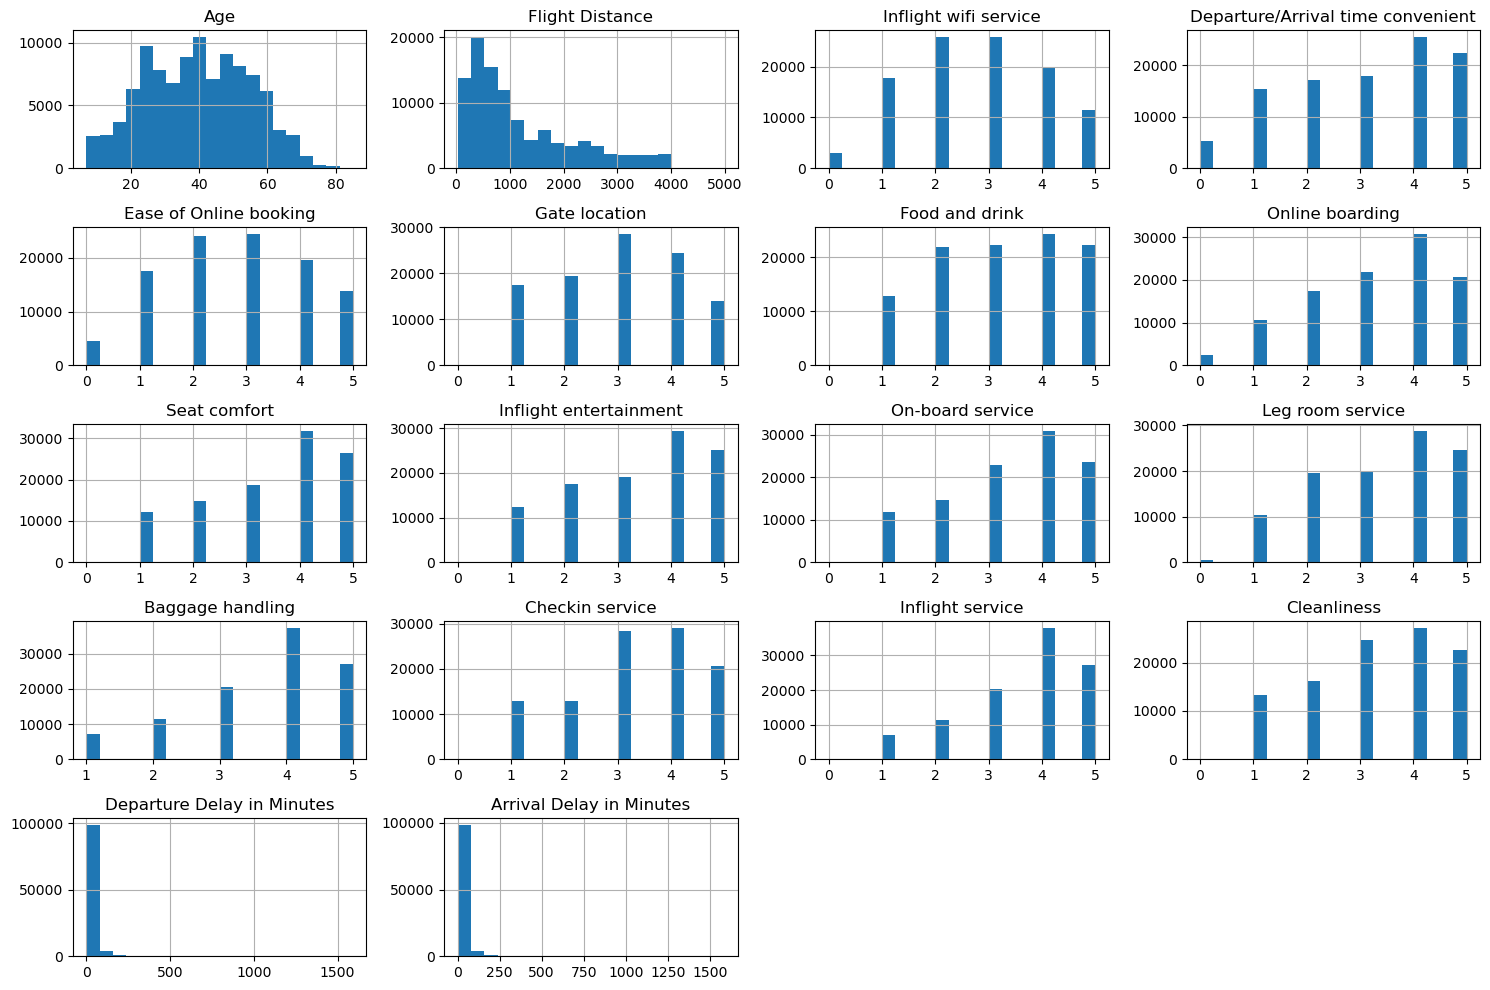

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

train_data = train_data.drop(['Unnamed: 0', 'id'], axis=1)

# Histograms for numerical features
train_data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplots for numerical features
#numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
#for col in numerical_cols:
#    plt.figure(figsize=(8, 4))
#    sns.boxplot(x=data[col])
#    plt.title(f'Boxplot of {col}')
#    plt.show()


### Correlation Between Features
- Check how numerical features correlate with each other, and see if there are any strong correlations. This can be done using a correlation matrix and visualized with a heatmap.

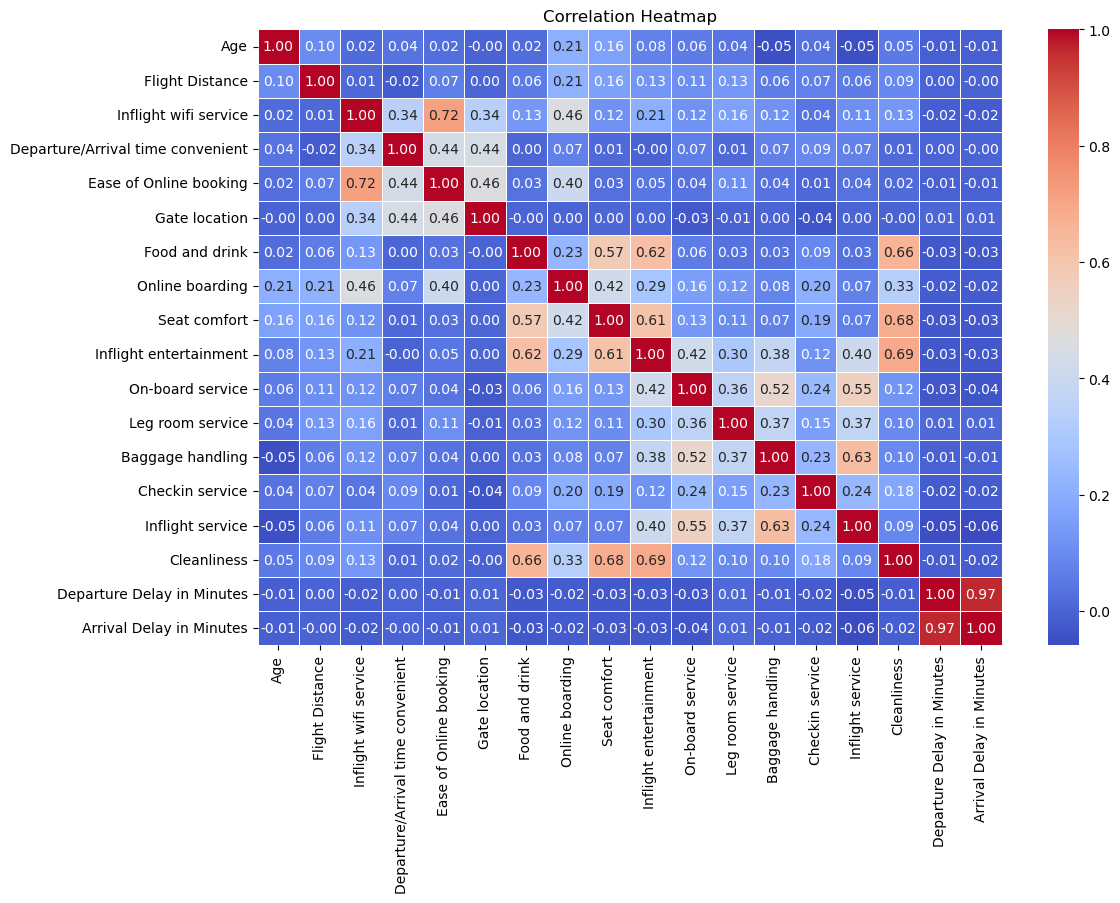

In [8]:
# Correlation matrix
numeric_data = train_data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### Distribution of Target Variable


Understanding the distribution of the target variable is crucial for understanding the problem type and guiding our approach.  

* Examine the data type of the target variable
* Visualize the target variable's distribution 

We start off by viewing the first few columns of the target variable

In [9]:
train_data['satisfaction'].head()

0    neutral or dissatisfied
1    neutral or dissatisfied
2                  satisfied
3    neutral or dissatisfied
4                  satisfied
Name: satisfaction, dtype: object

It seems to contain text data(characters) we can confirm that by viewing the data type, and the unique groups, if any, in the data.

In [11]:
print(f"The data type for the target column is {train_data['satisfaction'].dtype}")

The data type for the target column is object


In [13]:
print(f"The target variable 'satisfaction' consists of {train_data['satisfaction'].nunique()} unique categories, {' and '.join(train_data['satisfaction'].unique())}")

The target variable 'satisfaction' consists of 2 unique categories, neutral or dissatisfied and satisfied


It does contain text data but in the form of a category. There are 2 distinct categories for our text data.

To get a better idea of the target variable we plot the distribution of the class below.

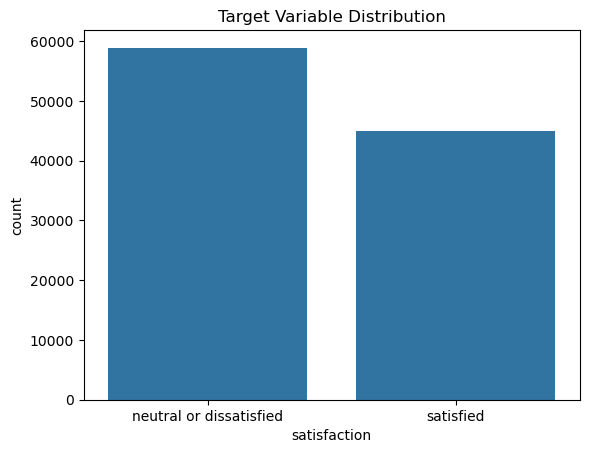

In [14]:
sns.countplot(data=train_data, x='satisfaction')
plt.title("Target Variable Distribution")
plt.show()

In [15]:
train_data['satisfaction'].value_counts(normalize=True)

satisfaction
neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: proportion, dtype: float64

There are slightly more `neutral or dissatisfied` observations than there are `satisfied` observations.

## Preprocessing Steps for the Airline Passenger Satisfaction Dataset

### 1. Handle Missing Values
From the Exploratory Data Analysis (EDA), we identified missing values in certain columns. We can handle them as follows:

- **Impute missing values in numerical columns** with the **median** or **mean**.
- **Impute missing values in categorical columns** with the **most frequent value** (mode).

### 2. Encoding Categorical Variables
Categorical columns like Gender, Type of Travel, Class, Satisfaction, and others will need to be encoded:

- **Satisfaction** will be encoded as a binary variable (`0` for "Dissatisfied", `1` for "Satisfied").
- Other categorical variables will be encoded using **one-hot encoding**, where applicable.

### 3. Feature Engineering
- **Age Group**: Based on the distribution of ages, we created **age bins**, which will be encoded using **one-hot encoding**.
- **Distance Group**: We might categorize the **Flight Distance** into bins (e.g., short, medium, long) for better interpretability.

### 4. Scaling Numerical Features
We need to **standardize** or **scale** numerical features like Age, Flight Distance, Seat Comfort, Inflight Wifi Service, etc., so that they all have similar scales. This will help avoid dominance of variables with larger ranges.


In [16]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import category_encoders as ce



categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 
                    'Inflight wifi service', 'Departure/Arrival time convenient', 
                    'Ease of Online booking', 'Gate location', 'Food and drink', 
                    'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                    'On-board service', 'Leg room service', 'Baggage handling', 
                    'Checkin service', 'Inflight service', 'Cleanliness']


numerical_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 
                  'Arrival Delay in Minutes']


# Define the target column (Satisfaction)
target_column = 'satisfaction'

# Create the preprocessing pipeline for features and target variable
preprocessor = make_column_transformer(
    
    (OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    
    
    (Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')), 
        ('scaler', StandardScaler()) 
    ]), numerical_cols)
)

# Apply BinaryEncoder to the target column 'satisfaction' 
target_encoder = ce.BinaryEncoder(cols=[target_column])

X_train = train_data.drop([target_column], axis=1)  
y_train = train_data[[target_column]]

preprocessor



ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'Customer Type', 'Type of Travel',
                                  'Class', 'Inflight wifi service',
                                  'Departure/Arrival time convenient',
                                  'Ease of Online booking', 'Gate location',
                                  'Food and drink', 'Online boarding',
                                  'Seat comfort', 'Inflight entertainment',
                                  'On-board service', 'Leg room service',
                                  'Baggage handling', 'Checkin service',
                                  'Inflight service', 'Cleanliness']),
                                ('pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Flight Distance',
                                  'Departure Delay in Minutes',
                                  'Arrival Delay in Minutes'])])

## Modelling

Firstly, we define the problem type by reviewing our target variable.

In [18]:
print(f"The target variable 'satisfaction' consists of {train_data['satisfaction'].nunique()} unique categories, {' and '.join(train_data['satisfaction'].unique())}")

The target variable 'satisfaction' consists of 2 unique categories, neutral or dissatisfied and satisfied


The target variable `satisfaction`, representing airline satisfaction, is a categorical variable(specifically, a binary variable). Therefore, we can frame this as a classifcation problem.

Defining the problem type aids in the selection of an appropriate model type.
As a baseline, the Dummy Classification model will be used, it predicts the majority class. For comparison, more sophisticated models will be implemented such as Support Vector Classification (SVC), Logistic Regression, and k-Nearest Neighbors (k-NN).

In [19]:
from sklearn.pipeline import make_pipeline

In [20]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_validate

#### Base Model

Our baseline model is the `DummyClassifier`, which predicts the majority class. This serves as a reference point for evaluating the performance of other models. Any model we implement should demonstrate performance that surpasses this baseline to be considered effective.

In [21]:
dummy_clf = make_pipeline(preprocessor, DummyClassifier())
dummy_results = pd.DataFrame(cross_validate(dummy_clf, X_train, y_train, return_train_score=True))

In [22]:
dummy_results

,fit_time,score_time,test_score,train_score
0,0.488783,0.099570,0.566671,0.566666
1,0.325692,0.110238,0.566671,0.566666
2,0.318251,0.092737,0.566671,0.566666
3,0.435096,0.093263,0.566671,0.566666
4,0.330398,0.094920,0.566651,0.566671


The base model has a validation score of approximately 56% accuracy(accuracy is the percentage of correct predictions and the default classification metric) which corresponds to the percentage of the majority class.

#### Comparison Model(s)

With the comparison models we aim to outperform the base models.

We start of with Logistic Regression

In [23]:
log_clf = make_pipeline(preprocessor, LogisticRegression(random_state=123))
log_results = pd.DataFrame(cross_validate(
    log_clf, 
    X_train, 
    y_train, 
    return_train_score=True
)).rename(columns={'test_score': 'validation_score'})

/Users/shengjiayu/miniforge3/envs/dsci522/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shengjiayu/miniforge3/envs/dsci522/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shengjiayu/miniforge3/envs/dsci522/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shengjiayu/miniforge3/envs/dsci522/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWar

In [24]:
log_results

,fit_time,score_time,validation_score,train_score
0,0.719495,0.082320,0.932150,0.933821
1,0.826926,0.094834,0.933738,0.934278
2,0.683727,0.087122,0.931765,0.934747
3,0.889329,0.087292,0.935181,0.933845
4,0.926715,0.088379,0.935082,0.934050


The Logistic Regression Model greatly outperforms the base model. It generates train and validation with approximately 93% accuracy. This is a significant improvement from the 53% accuracy. 

Accuracy might not be the most informative metric for our model.

Below we consider other models and report different scoring metrics for the models.

In [25]:
from sklearn.metrics import make_scorer, f1_score

In [47]:
models = {
    "dummy": DummyClassifier(random_state=123), 
    "Logistic Regression": LogisticRegression(random_state=123),
    "Decision Tree": DecisionTreeClassifier(random_state=123),
}


scoring = {
    'accuracy': 'accuracy',
}



In [48]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    pipe = make_pipeline(preprocessor, model)
    scores = cross_validate(pipe, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [49]:
results_df = {}

for name, estimator in models.items():
    scores = mean_std_cross_val_scores(estimator,
                                       X_train, y_train, 
                                       return_train_score=True,
                                       scoring=scoring)
    results_df[name] =  scores
    
results_df = pd.DataFrame(results_df).T
results_df.rename(columns={'test_accuracy': 'validation_accuracy'}, inplace=True)

/Users/shengjiayu/miniforge3/envs/dsci522/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shengjiayu/miniforge3/envs/dsci522/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/Users/shengjiayu/miniforge3/envs/dsci522/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/shengjiayu/miniforge3/envs/dsci522/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/Users/shengjiayu/miniforge3/envs/dsci522/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1293, in f1_score
    return fbeta_score(
  File "/Users/shengjiayu/miniforge3/envs/

In [50]:
results_df

,fit_time,score_time,validation_accuracy,train_accuracy,test_f1,train_f1
dummy,0.341 (+/- 0.028),0.165 (+/- 0.005),0.567 (+/- 0.000),0.567 (+/- 0.000),nan (+/- nan),nan (+/- nan)
Logistic Regression,0.808 (+/- 0.122),0.184 (+/- 0.062),0.934 (+/- 0.002),0.934 (+/- 0.000),nan (+/- nan),nan (+/- nan)
Decision Tree,2.325 (+/- 0.025),0.160 (+/- 0.007),0.947 (+/- 0.001),1.000 (+/- 0.000),nan (+/- nan),nan (+/- nan)


The Decision Tree model has the highest validation accuracy at 94.7%.
Its training accuracy is 100%, which indicates it perfectly fits the training data but may be overfitting.
The validation accuracy is 93.4%, slightly lower than the Decision Tree.
Its training accuracy is close to its validation accuracy, suggesting it generalizes better and is less likely to overfit.
The validation accuracy is 56.7%, the lowest among all models, which aligns with predicting the majority class.
Logistic Regression: A strong candidate due to its high validation accuracy and good generalization.

In [43]:
# Prepare the test set
X_test = test_data.drop(columns=['satisfaction'])
y_test = test_data['satisfaction']
y_test = y_test.values.ravel()

# Define the Logistic Regression pipeline
final_model = make_pipeline(preprocessor, LogisticRegression(random_state=123))

# Train the model on the training data
final_model.fit(X_train, y_train.values.ravel())  

# Predict on the test set
y_test_pred = final_model.predict(X_test)

# Evaluate the model performance
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Logistic Regression Test Accuracy: 0.9322836464428703

Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.95      0.94     14573
              satisfied       0.93      0.91      0.92     11403

               accuracy                           0.93     25976
              macro avg       0.93      0.93      0.93     25976
           weighted avg       0.93      0.93      0.93     25976



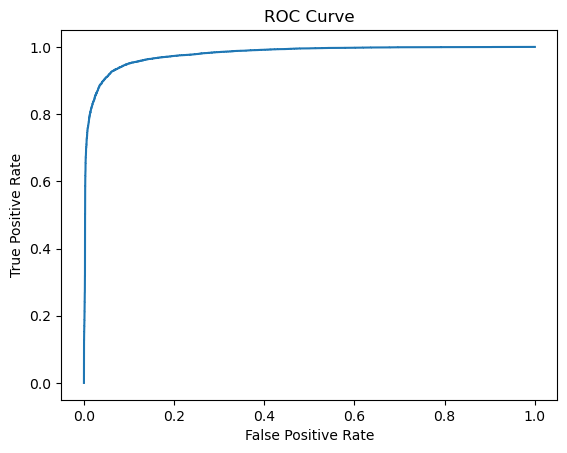

In [46]:
# Encode y_test to numeric values
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

y_test_proba = final_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_test_proba)
roc_auc = roc_auc_score(y_test_encoded, y_test_proba)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f"AUC-ROC: {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


# Discussion

# References

Below are the code or concept references for this analysis

- `mean_std_cross_val_scores` referenced from the DSCI_571 lab 4